In [71]:
import pandas as pd
from src.database.database import DB
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from src.classes.process.pnl import Pnl
from tqdm import tqdm
import time
import os

LINK DO POST

In [26]:
# link do post

link = 'https://www.instagram.com/doldiarioonline/p/DGDmjvbRGtu/'

In [48]:
#bando de dados
load_dotenv()
con = DB.conexao()
TABLE_P = os.getenv('TABLE_P')
TABLE_W_S = os.getenv('TABLE_W_S')
TABLE_C = os.getenv('TABLE_C')


In [28]:

query = f'''
select 
	p.data_post,
    p.nome_pagina,
    cs.sentimento
from {TABLE_P} p
inner join {TABLE_W_S} cs on p.id_posts = cs.posts_id_posts
where p.link = '{link}';
'''
df = pd.read_sql(query,con)
df['qtde'] = 1

display(df)


C:\Users\jgust\AppData\Local\Temp\ipykernel_13704\3150828178.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,con)


,data_post,nome_pagina,sentimento,qtde
0,2025-02-12,Diário online do Pará,I'm ready to classify the sentiment of the co,1
1,2025-02-12,Diário online do Pará,Negativo,1
2,2025-02-12,Diário online do Pará,Negativo,1
3,2025-02-12,Diário online do Pará,Positivo,1
4,2025-02-12,Diário online do Pará,Positivo,1
...,...,...,...,...
109,2025-02-12,Diário online do Pará,Positivo,1
110,2025-02-12,Diário online do Pará,Negativo,1
111,2025-02-12,Diário online do Pará,Negativo,1
112,2025-02-12,Diário online do Pará,Negativo,1


Gráfico de barras

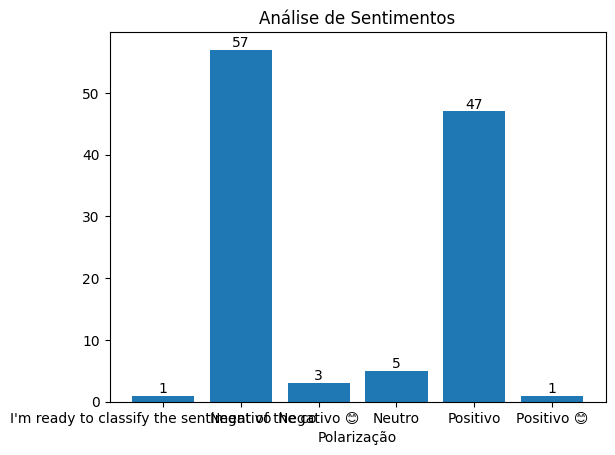

In [29]:

df_tratato = df.groupby(by=['data_post','sentimento','nome_pagina']).sum( ).reset_index()
fig, ax = plt.subplots()
barras =ax.bar(df_tratato['sentimento'],df_tratato['qtde'])
ax.bar_label(barras)
ax.set_xlabel('Polarização')
ax.set_title('Análise de Sentimentos')
plt.show()

In [64]:
query_comment =f'''
select 
	c.comentario
from {TABLE_P} p
inner join {TABLE_C} c on p.id_posts = c.posts_id_posts
where p.link = '{link}';
'''
df2 = pd.read_sql(query_comment, con)
df2

C:\Users\jgust\AppData\Local\Temp\ipykernel_13704\3557819498.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query_comment, con)


,comentario
0,
1,DEUS ME LIVRE ESTA ONDE ESSES AÍ ESTÃO …. SEG...
2,Dois atrasos
3,👏👏👏👏
4,P
...,...
109,Acho que ele tem ouro😂😂😂😂😂😂
110,# Fora Rossiele
111,Kkkk 2 imagem regando uma árvore ninguém pr...
112,Já tá na cachaça


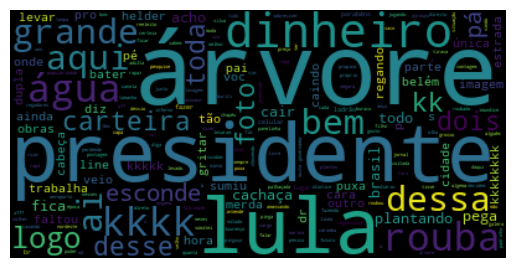

In [69]:

comentarios = Pnl.apply_stop_word(df2)

texto = ' '.join(comentarios)


#texto = 'joao gustavo carvalho de jesus jesus jesus joao joao gustavo gus gus gus carvalho'
nuvem_de_palavras = WordCloud().generate(texto)



fig, ax = plt.subplots()
ax.imshow(nuvem_de_palavras,interpolation='bilinear')

ax.set_axis_off()